# Automotive Mechatronics Extra Credit Assignment
Name : Suryakiran George

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf
import cv2
import os
import numpy as np

In [2]:
labels = ['al','ar','center','left','right']
img_size = 224

def get_data(data_dir):
  data =[]
  for label in labels:
      path = os.path.join(data_dir, label)
      class_num = labels.index(label)
      for img in os.listdir(path):
          try:
              img_arr = cv2.imread(os.path.join(path,img))[...,::-1]
              resized_arr = cv2.resize(img_arr,(img_size,img_size))
              data.append([resized_arr,class_num])
          except Exception as e:
              print(e)
  return np.array(data)

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train = get_data('drive/MyDrive/LidarDataSet/train')
val = get_data('drive/MyDrive/LidarDataSet/val')

#train = get_data('C:/Users/surya/Desktop/LidarDataSet/LidarDataSet/train/')
#val = get_data('C:/Users/surya/Desktop/LidarDataSet/LidarDataSet/val/')

l = []

for i in train:
    if (i[1] == 0):
        l.append("al")
    elif(i[1] == 1):
        l.append("ar")
    elif(i[1] == 2):
        l.append("center")
    elif(i[1] == 3):
        l.append("left")
    elif(i[1] == 4):
        l.append("right")
        
sns.set_style('darkgrid')
#sns.countplot(l)
#plt.show()


Mounted at /content/drive


<ipython-input-2-6dbeed218596>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

#Normalize the data
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255

In [5]:
x_train.reshape(-1,img_size,img_size,1)
y_train = np.array(y_train)

x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

datagen = ImageDataGenerator(
    featurewise_center = False, 
    samplewise_center=False, 
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    rotation_range=30, 
    zoom_range=0.2, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True, 
    vertical_flip=False)

datagen.fit(x_train)

In [6]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224,224,3), include_top = False, weights = "imagenet")
base_model.trainable = False

In [7]:
model = tf.keras.Sequential([base_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(5, activation = "softmax"
                             )])

In [8]:
base_learning_rate = 0.001
model.compile(optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 30, validation_data = (x_val,y_val))


Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 [==============================] - 14s 3s/step - loss: 1.8811 - accuracy: 0.2128 - val_loss: 1.5111 - val_accuracy: 0.3000
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 1.5568 - accuracy: 0.3723 - val_loss: 1.5026 - val_accuracy: 0.4333
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 1.4037 - accuracy: 0.4255 - val_loss: 1.3464 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 9s 3s/step - loss: 1.2155 - accuracy: 0.5319 - val_loss: 1.1133 - val_accuracy: 0.6333
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 1.0625 - accuracy: 0.5532 - val_loss: 0.9820 - val_accuracy: 0.6333
Epoch 6/30
3/3 [==============================] - 7s 3s/step - loss: 1.0024 - accuracy: 0.5957 - val_loss: 0.8807 - val_accuracy: 0.7333
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.8773 - accuracy: 0.7128 - val_loss: 0.7947 - val_accuracy: 0.8333
Epoch 8/30
3/3 [==============================] - 6

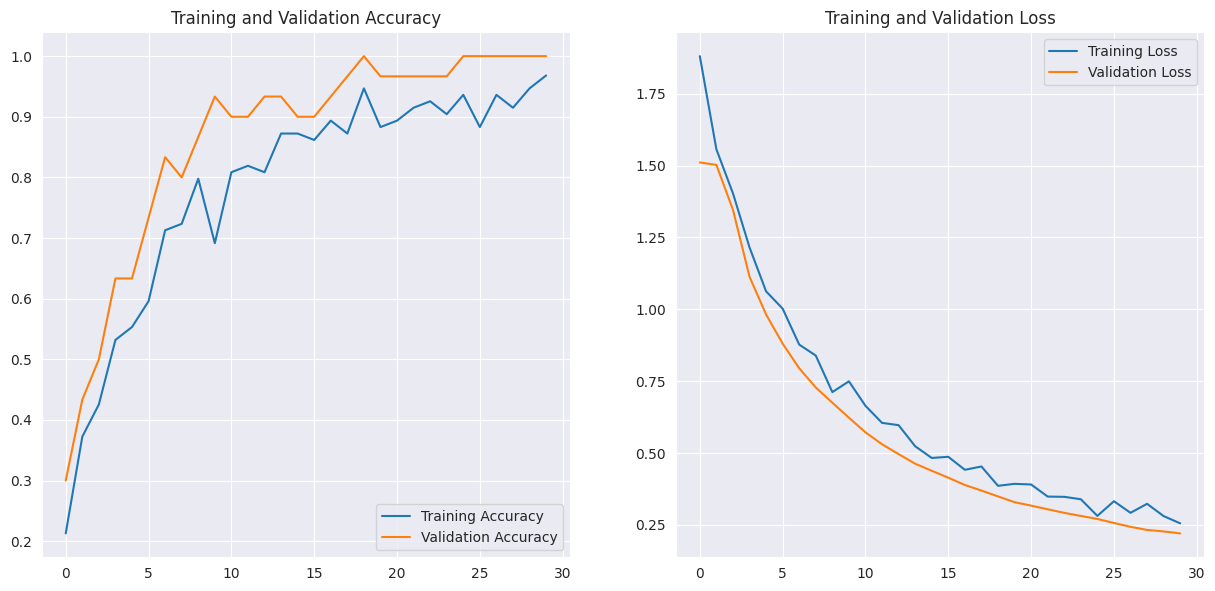

1/1 [==============================] - 4s 4s/step
                  precision    recall  f1-score   support

    al (Class 0)       1.00      1.00      1.00         9
    ar (Class 1)       1.00      1.00      1.00         7
center (Class 2)       1.00      1.00      1.00         6
  left (Class 3)       1.00      1.00      1.00         4
 right (Class 4)       1.00      1.00      1.00         4

        accuracy                           1.00        30
       macro avg       1.00      1.00      1.00        30
    weighted avg       1.00      1.00      1.00        30



In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predictions = model.predict(x_val)
predictions = np.argmax(predictions, axis = -1)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['al (Class 0)','ar (Class 1)','center (Class 2)', 'left (Class 3)', 'right (Class 4)']))
